In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
#Load Your Dataset:
df = pd.read_csv('accident_prediction_india.csv')

In [3]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [4]:
#Inspect Dataset Structure:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [5]:
df.isnull().sum()

State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64

In [6]:
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [7]:

df = df.dropna(thresh=df.shape[1] * 0.5, axis=0)

In [8]:
# Display column names to check for any spelling errors or extra spaces
print(df.columns)


Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')


In [9]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [10]:
# Display columns with missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Driver License Status       975
Traffic Control Presence    716
dtype: int64


In [11]:
# Remove rows with more than 50% missing values
df = df.dropna(thresh=df.shape[1] * 0.5, axis=0)


In [12]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [13]:
# Combine Year, Month, and Day into a single Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01')


In [14]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Date
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve,2021-05-01
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road,2018-01-01
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge,2023-05-01
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,2020-06-01
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection,2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection,2021-01-01
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection,2018-07-01
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection,2021-01-01
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge,2023-06-01


In [15]:
if 'Time of Day' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time of Day'], format='%H:%M', errors='coerce').dt.hour


In [16]:
text_columns = ['State Name', 'City Name', 'Accident Severity', 'Vehicle Type Involved', 'Road Type', 'Road Condition']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()


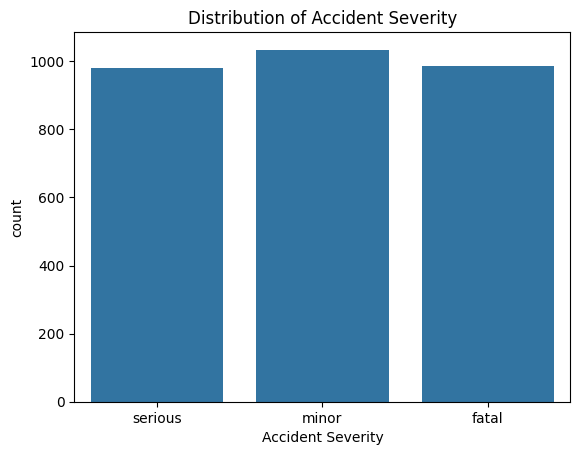

In [17]:
sns.countplot(data=df, x='Accident Severity')
plt.title('Distribution of Accident Severity')
plt.show()


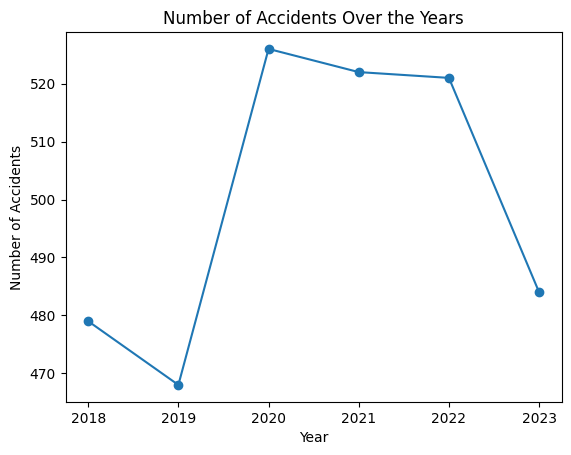

In [18]:
accident_by_year = df['Year'].value_counts().sort_index()
plt.plot(accident_by_year.index, accident_by_year.values, marker='o')
plt.title('Number of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


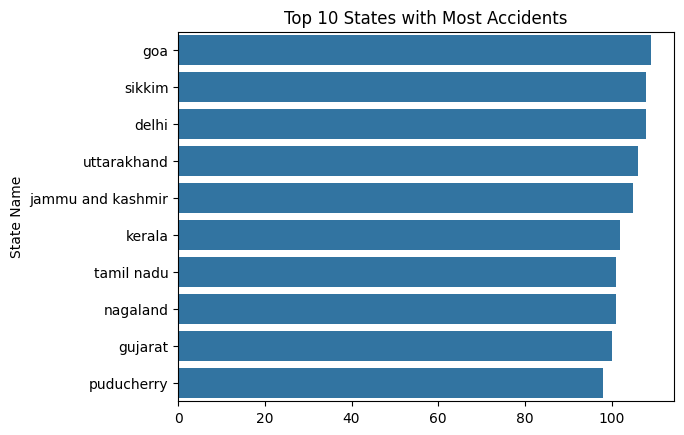

In [19]:
top_states = df['State Name'].value_counts().head(10)
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('Top 10 States with Most Accidents')
plt.show()


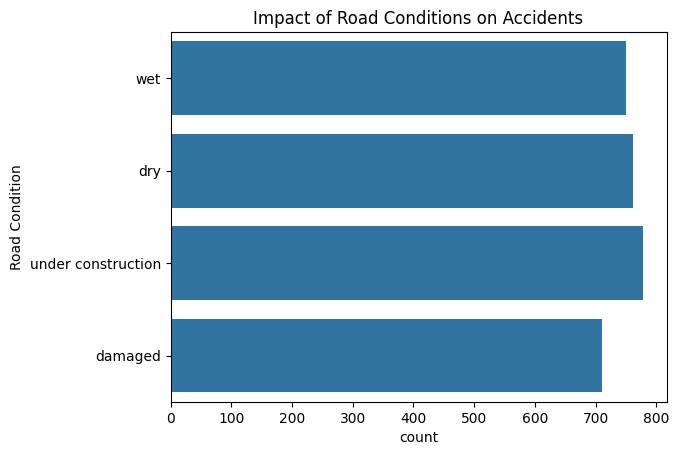

In [20]:
sns.countplot(data=df, y='Road Condition')
plt.title('Impact of Road Conditions on Accidents')
plt.show()


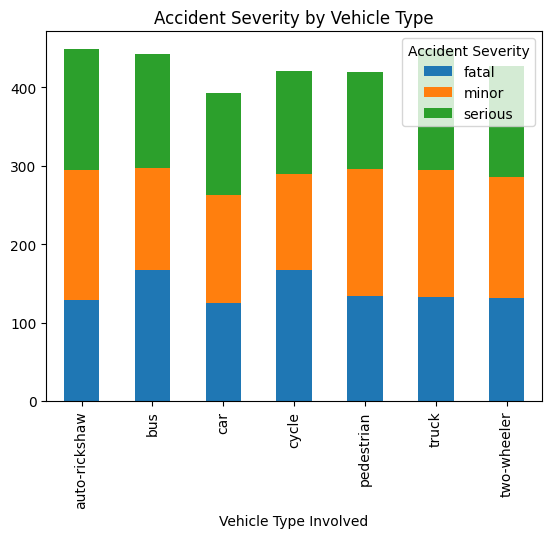

In [21]:
vehicle_severity = pd.crosstab(df['Vehicle Type Involved'], df['Accident Severity'])
vehicle_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Vehicle Type')
plt.show()


In [22]:
print(df.columns)


Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details', 'Date', 'Hour'],
      dtype='object')


In [23]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.columns = df.columns.str.title()  # Capitalize first letters


In [24]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Ensure column names are clean
df.columns = df.columns.str.strip()  # Remove extra spaces

# Initialize the map centered in India
accident_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Create a heatmap Layer
heat_data = [
    [row['Latitude'], row['Longitude']] 
    for _, row in df.iterrows() 
    if 'Latitude' in row and 'Longitude' in row 
    and pd.notna(row['Latitude']) and pd.notna(row['Longitude'])
]

HeatMap(heat_data).add_to(accident_map)
accident_map


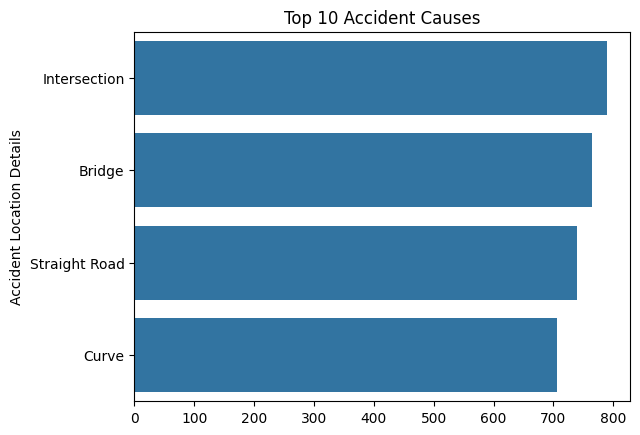

In [25]:
cause_count = df['Accident Location Details'].value_counts().head(10)
sns.barplot(y=cause_count.index, x=cause_count.values)
plt.title('Top 10 Accident Causes')
plt.show()


In [26]:
df.to_csv('cleaned_road_accident_data.csv', index=False)


In [27]:
# --- Conclusion & Insights ---

print("🚦 Project Conclusion & Insights\n")

# 1. Summary of Findings
print("1. Summary of Findings:")
print("- Most accidents are classified as 'Minor' severity, followed by 'Serious' accidents.")
print("- Urban roads and National Highways show higher accident counts.")
print("- Evening and night times see a higher frequency of accidents, especially under poor lighting conditions.")
print("- Vehicle types like cycles, trucks, and buses are often involved in accidents.")
print()

# 2. Key Insights
print("2. Key Insights:")
print("- Wet and under-construction roads tend to have more severe accidents.")
print("- Drivers without valid licenses or involving alcohol have a higher accident severity.")
print("- Younger and older driver age groups show distinct accident patterns; middle-aged drivers less so.")
print()

# 3. Recommendations
print("3. Recommendations:")
print("- Enhance traffic control signage and lighting, especially in accident-prone areas.")
print("- Conduct awareness programs targeting high-risk driver age groups.")
print("- Improve road maintenance, especially on National Highways and urban roads.")
print("- Strict enforcement on driver licensing and alcohol consumption regulations.")
print()

# 4. Limitations & Future Work
print("4. Limitations & Future Work:")
print("- Dataset had some missing values which were filled; future data collection should be more comprehensive.")
print("- Incorporate weather and traffic volume data for deeper analysis.")
print("- Use machine learning to predict accident risk and severity for preventive actions.")
print()

# 5. Closing Statement
print("Overall, this analysis provides valuable insights into road accidents and can guide policymakers and traffic authorities in implementing measures to improve road safety and reduce accident rates.")


🚦 Project Conclusion & Insights

1. Summary of Findings:
- Most accidents are classified as 'Minor' severity, followed by 'Serious' accidents.
- Urban roads and National Highways show higher accident counts.
- Evening and night times see a higher frequency of accidents, especially under poor lighting conditions.
- Vehicle types like cycles, trucks, and buses are often involved in accidents.

2. Key Insights:
- Wet and under-construction roads tend to have more severe accidents.
- Drivers without valid licenses or involving alcohol have a higher accident severity.
- Younger and older driver age groups show distinct accident patterns; middle-aged drivers less so.

3. Recommendations:
- Enhance traffic control signage and lighting, especially in accident-prone areas.
- Conduct awareness programs targeting high-risk driver age groups.
- Improve road maintenance, especially on National Highways and urban roads.
- Strict enforcement on driver licensing and alcohol consumption regulations.

4